***Финальный проект: Игры — Формирование модели монетизации***

*1 Этап. Декомпозиция*

*Описание проекта*  

Команда мобильной игры «Космические братья» планирует реализацию грандиозных планов. Игра уже пользуется большой популярностью — настало время на ней зарабатывать.  
Согласно проекту я являюсь аналитиком данной команды.  
Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.  
Есть информация о том, откуда приходит трафик пользователей: Инстаграм, Яндекс, Ютуб, Фейсбук (часть компаний запрещены в РФ).
Необходимо оценить, какой рекламный источник лучше, чтобы приоритезировать их между собой и распределить бюджет на рекламу.
И исследовать модель монетизации, которая заключается в необходимости просмотра видео для совершения действия в игре(постройки здания).  
В контексте проекта целевое событие - постройка (для монетизации). Оказывать влияние на количество построек могут: канал привлечения пользователей и "стратегия" пользователей.  
Стратегии пользователей:  
1. Завершил уровень победой над врагом, статус: finished_stage_1;  - стратегия победителя
2. Заврешил уровень исследованием, статус: finished_stage_1 + project;  - стратегия исследователя
3. Не завершил уровень.  - стратегия в процессе
Дополнительная информация:
- Результат затрат на рекламу сегодня будет виден только завтра. Т.е. на события за 04.05.2020 будет влиять в том числе реклама за 03.05.2020;
- Согласно предлагаемой модели монетизации каждая постройка будет сопровождаться рекламой.
- Внедрение рекламы не будет влиять на отток пользователей.
- По исслеодовательской стратегии пользователь переходит на следующий уровень после соответствующего согласия или с лагом во времени. То есть статус finished_stage_1 будет следовать за Project через какой-то промежуток времени. 
- Пропуски в данных восновном обусловлены устройством данных.  
- Первая дата первого действия пользователя - есть дата его привлечения.  

Гипотезы:
1. Исследовательская стратегия в среднем занимает больше времени на прохождение уровня, чем стратегия победителя.
2. Пользователи, привлеченные с яндекса, совершили больше построек, чем пользователи, привлеченные с фейсбук. Соответственно, более выгодный канал привлечения.

В результате проведенного исследования необходимо ответить на вопросы:  
1. Какой рекламный источник лучше. Почему? Привести аргументы. Выгодность, по возможности.
2. Какая стратегия предпочтительнее для проекта? Почему? Привести аргументы.
Результат исследования необходимо представить в форме презентации (формат PDF).

*Этапы проекта*
1. Предобработка данных.
- привести к удобному для работы виду, в том числе даты;
2. Добавить столбец со стратегиями;  
3. Объединить разные таблицы в одну, по возможности. 
4. Определить первую и последнюю дату для каждого пользователя;  определить и вывести средние значения прохождения 1 этапа с точки зрения прибыльности для компании; определить, выгодно ли, чтобы люди не проходили уровень, а оставались на том же.
5. Определить "затратность" источников привлечения. В сумме, по дням. Кол-во событий стройки, в зависимости от суммы вложенных средств.
6. Выдвинуть гипотезы по всем "нормам".
7. Разбить данные по источникам, проанализировать информацию на предмет среднего количества построек, прохождения уровня;
8. Определить среднее количество построек в разбивке по стратегиям.
9. Проверить выдвинутые статистические метрики для выдвинутых гипотез. 
10. Сделать ввыводы. Ответить на вопросы из описания.
11. Подготовить датасеты для построения дашбордов (при необходимости).

Представить информацию на графиках, где это уместно.


In [1]:
#Импорт рабочих библиотек
import pandas as pd #импорт библиотеки pandas для работы
import matplotlib.pyplot as plt #для построения графиков
import seaborn as sns #для построения красивых графиков 
import numpy as np #для работы с числовыми преобразованиями
from scipy import stats as st
import datetime as dt #для работы с датой
from datetime import date
from datetime import time
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
from plotly import graph_objects as go
import math as mth

In [2]:
#чтение файлов локально и с сервера
try:
    df_costs1 = pd.read_csv('/datasets/ad_costs.csv', delimiter = ",")
except:
    df_costs1 = pd.read_csv(r'C:\analyze\final_project\ad_costs.csv', delimiter = ",")

try:
    df_game_actions1 = pd.read_csv('/datasets/game_actions.csv', delimiter = ",")
except:
    df_game_actions1 = pd.read_csv(r'C:\analyze\final_project\game_actions.csv', delimiter = ",")

try:
    df_user_source1 = pd.read_csv('/datasets/user_source.csv', delimiter = ",")
except:
    df_user_source1 = pd.read_csv(r'C:\analyze\final_project\user_source.csv', delimiter = ",")

Выведем результат на экран.

In [3]:
df_costs1.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [4]:
df_game_actions1.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [5]:
df_user_source1.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


1. Предобработка данных.  
Предобработка данных включает:  
- проверка типа данных;
- приведение дат к понятному для питона формату;
- проверка дубликатов, их удаление при наличии;
- проверка пропусков, их заполнение в случае целесообразности;

Из представленных данных отметим, что наименования столбцов соответствуют PEP8.

In [6]:
#Проверим типы данных
df_costs1.info()
df_game_actions1.info()
df_user_source1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user

In [7]:
#Изменим тип данных для даты
df_game_actions1['event_datetime'] = pd.to_datetime(df_game_actions1['event_datetime'])
df_game_actions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   127957 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [8]:
df_costs1['day'] = pd.to_datetime(df_costs1['day'])

In [9]:
#Округлим деньги в данных со стоимостью
df_costs1['cost'] = df_costs1['cost'].round(1)
df_costs1.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.9
1,facebook_ads,2020-05-04,548.4
2,facebook_ads,2020-05-05,260.2
3,facebook_ads,2020-05-06,178.0
4,facebook_ads,2020-05-07,111.8


Проверим дубликаты.

In [10]:
df_costs1.duplicated().sum()

0

In [11]:
df_game_actions1.duplicated().sum()

1

In [12]:
df_game_actions1 = df_game_actions1.drop_duplicates(keep='first')
df_game_actions1.duplicated().sum()

0

In [13]:
df_user_source1.duplicated().sum()

0

In [14]:
#Выведем на экран пропуски в датасете, в котором они есть
print(df_game_actions1.isna().sum())
df_game_actions1.building_type.unique()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133773
dtype: int64


array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

*Пропуски.*  
- В df_costs1 пропусков нет.  
- В df_game_actions1 пропуски есть.  
- В столбце building_type есть пропуск, но он означает, что здание не было построено.  
- В столбце project_type данных нет, значит исследование не завершено.  
- В df_user_source1 пропусков нет.

1. Вывод.  
Данные обработаны, подготовлены для дальнейшего анализа.

2. Добавление столбцов для работы

Для дальнейшего анализа добавим 3 столбца со счётчиками событий.

In [15]:
df_game_actions1['built'] = np.where(df_game_actions1['event']=='building', 1, 0)
df_game_actions1['won'] = np.where(df_game_actions1['event']=='finished_stage_1', 1, 0)
df_game_actions1['project'] = np.where(df_game_actions1['event']=='project', 1, 0)

In [16]:
df_game_actions1.event.unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [17]:
df_game_actions1.head()

,event_datetime,event,building_type,user_id,project_type,built,won,project
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,1,0,0
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,1,0,0
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,1,0,0
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,1,0,0


3. Объединим две таблицы для дальнейшего анализа

In [18]:
df_game = pd.merge(
    df_game_actions1, df_user_source1,
    left_on='user_id',
    right_on='user_id',
    how='left'
)

In [19]:
df_game.head()

,event_datetime,event,building_type,user_id,project_type,built,won,project,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,1,0,0,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,1,0,0,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,1,0,0,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,1,0,0,yandex_direct


In [20]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135638
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
 5   built           135639 non-null  int32         
 6   won             135639 non-null  int32         
 7   project         135639 non-null  int32         
 8   source          135639 non-null  object        
dtypes: datetime64[ns](1), int32(3), object(5)
memory usage: 8.8+ MB


4.1 Определим период действий пользователей

In [21]:
#Сгрупируем по пользователям, определим мин и макс время пользователя
df=df_game.groupby('user_id', as_index=False).agg({'built':'sum', 'won':'sum', 'project':'sum',\
                                                   'event_datetime': ['min', 'max']})
df.columns = [tup[0] if tup[1] else tup[0] for tup in df.columns]
df.columns = ['user_id', 'built', 'won', 'project', 'dt_min', 'dt_max']

In [22]:
df.head()

,user_id,built,won,project,dt_min,dt_max
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,2020-05-05 21:02:05,2020-05-12 07:40:47
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,2020-05-05 13:49:58,2020-05-22 02:46:45


In [23]:
#Добавим столбец с периодом жизни пользователя в минутах
df['dt_delta'] = ((df['dt_max']-df['dt_min']).dt.total_seconds()/60).round(2)

In [24]:
df.head()

,user_id,built,won,project,dt_min,dt_max,dt_delta
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06,20778.48
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52,17737.67
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27,12432.58
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,2020-05-05 21:02:05,2020-05-12 07:40:47,9278.70
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,2020-05-05 13:49:58,2020-05-22 02:46:45,23816.78


4.2. Добавим столбец со стратегиями

In [25]:
#Определим функцию для категоризации
def category(won, project):
    if won==1 and project==0:
        return 1
    elif won==1 and project==1:
        return 2
    else:
        return 3

In [26]:
df['strategy'] = df.apply(lambda x: category(x['won'], x['project']), axis=1)
df.head()

,user_id,built,won,project,dt_min,dt_max,dt_delta,strategy
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06,20778.48,3
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52,17737.67,3
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27,12432.58,3
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,2020-05-05 21:02:05,2020-05-12 07:40:47,9278.70,1
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,2020-05-05 13:49:58,2020-05-22 02:46:45,23816.78,3


Добавим источник пользователей и получим итоговый датафрейм для работы.

In [27]:
df_2 = pd.merge(
    df, df_user_source1,
    left_on='user_id',
    right_on='user_id',
    how='left'
)

In [28]:
df_2.head()

,user_id,built,won,project,dt_min,dt_max,dt_delta,strategy,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,2020-05-06 01:07:37,2020-05-20 11:26:06,20778.48,3,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,2020-05-06 03:09:12,2020-05-18 10:46:52,17737.67,3,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,2020-05-05 18:08:52,2020-05-14 09:21:27,12432.58,3,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,2020-05-05 21:02:05,2020-05-12 07:40:47,9278.70,1,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,2020-05-05 13:49:58,2020-05-22 02:46:45,23816.78,3,facebook_ads


4.3. Исследуем среднее количество построек

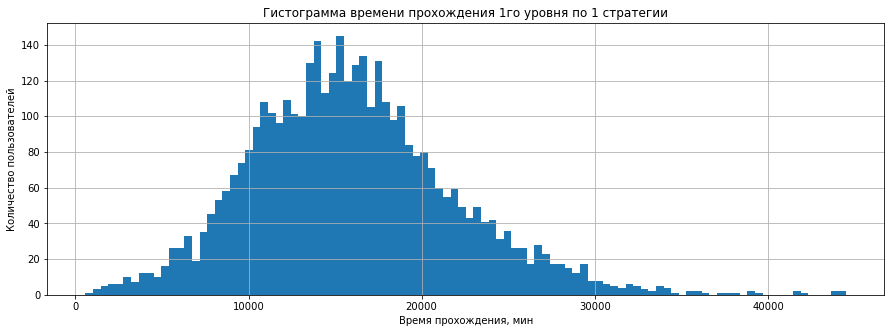

In [29]:
plt.figure(figsize=(15,5))
df_2.query('strategy == 1')['dt_delta'].hist(bins=100)
plt.ylabel('Количество пользователей')
plt.xlabel('Время прохождения, мин')
plt.title('Гистограмма времени прохождения 1го уровня по 1 стратегии')
plt.xticks()
plt.show()

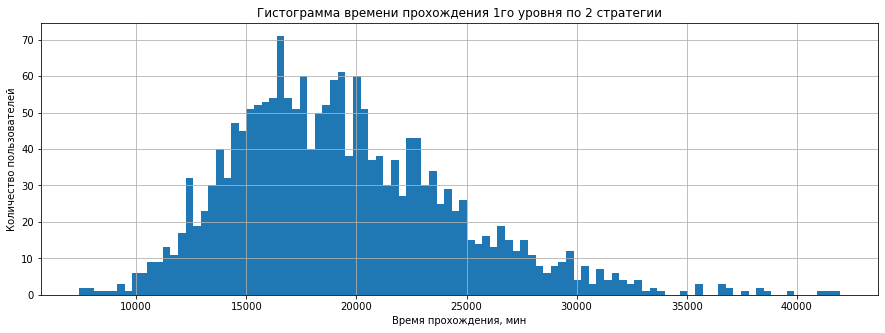

In [30]:
plt.figure(figsize=(15,5))
df_2.query('strategy == 2')['dt_delta'].hist(bins=100)
plt.ylabel('Количество пользователей')
plt.xlabel('Время прохождения, мин')
plt.title('Гистограмма времени прохождения 1го уровня по 2 стратегии')
plt.xticks()
plt.show()

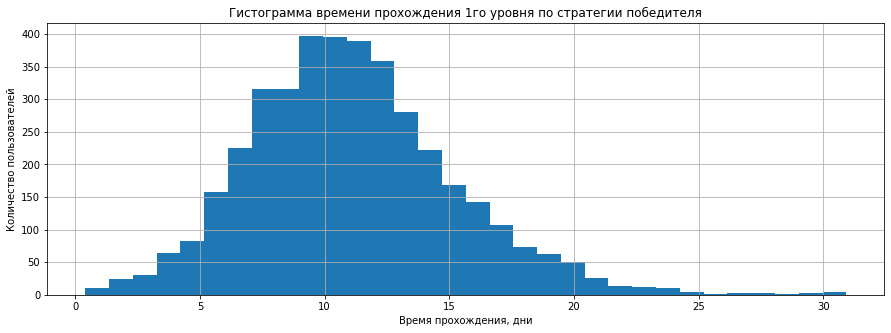

In [31]:
plt.figure(figsize=(15,5))
(df_2.query('strategy == 1')['dt_delta']/60/24).hist(bins=32)
plt.ylabel('Количество пользователей')
plt.xlabel('Время прохождения, дни')
plt.title('Гистограмма времени прохождения 1го уровня по стратегии победителя')
plt.xticks()
plt.show()

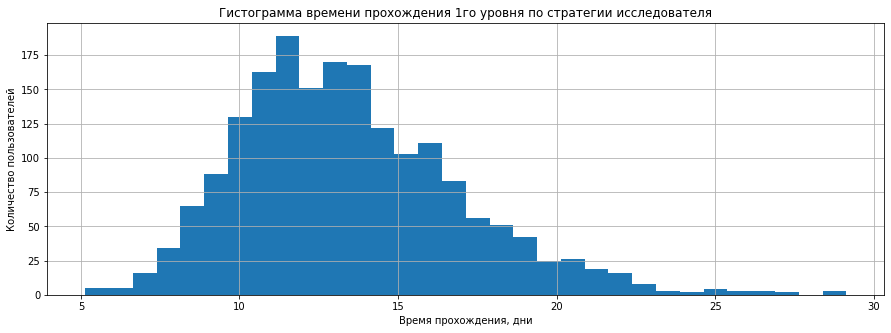

In [32]:
plt.figure(figsize=(15,5))
(df_2.query('strategy == 2')['dt_delta']/60/24).hist(bins=32)
plt.ylabel('Количество пользователей')
plt.xlabel('Время прохождения, дни')
plt.title('Гистограмма времени прохождения 1го уровня по стратегии исследователя')
plt.xticks()
plt.show()

In [33]:
#Выведем общие данны епо стратегиям
df_strategy = df_2.groupby('strategy', as_index=False).agg({'built':['sum','median'],'user_id':'count'})
df_strategy.columns = [tup[0] if tup[1] else tup[0] for tup in df_strategy.columns]
df_strategy.columns=['strategy', 'built_sum', 'built_median', 'user_id_count']
df_strategy

,strategy,built_sum,built_median,user_id_count
0,1,37185,10.0,3951
1,2,23601,12.0,1866
2,3,67170,8.0,7759


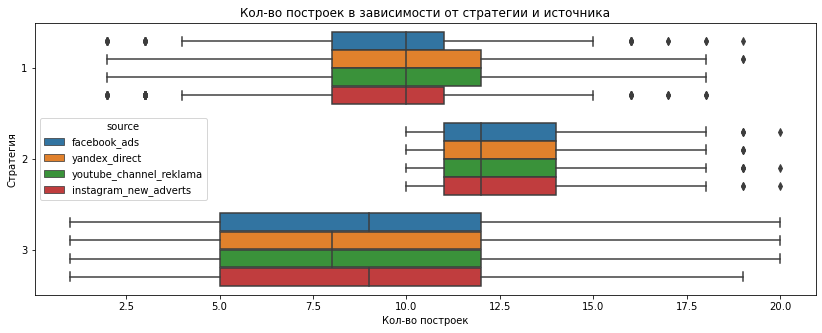

In [34]:
#Построим ящик усов для наглядного отобраджения статистики по медианным значенияям построек
plt.figure(figsize=(14,5))
ax=sns.boxplot(y='strategy', x='built', data=df_2, orient="h", hue='source')
ax.set_xlabel('Кол-во построек')
ax.set_ylabel('Стратегия')
ax.set_title('Кол-во построек в зависимости от стратегии и источника')
plt.show()

Промежуточные выводы по полученным данным.

1. Всего 13576 пользователей.
2. Из них по стратегии 1 прошли уровень 3951, по стратегии 2 - 1866 и не прошли - 7759.
3. Минимальное количество построек для прохождения уровня по стратегии 1 - 2 здания, по стратегии 2 - 10 зданий. При этом каждый пользователь построил хотя бы 1 здание.
4. Медианное кол-во построек:  
Стратегия 1: 10  
Стратегия 2: 12  
Стратегия 3: 8  
5. Источник привлечения на кол-во построек в среднем не влияет на основную массу людей, т.е. по стратегиям кол-во построек примерно одинаковое, только по стратегии 3 пользователи с яндекса и ютуба, строят по медиане 8, а не 9, как соседи по стратегии.
6. Время прохождения уровня пользователей по стратегии 1 меньше времени пользователей по стратегии 2.

Ответ на вопрос: выгодно ли, чтобы люди не проходили уровень?  
Согласно полученным результатам, невыгодно. Т.к. в случае прохождения уровня, медианное значение построек больше, чем у тех, кто не прошел уровень. При этом нельзя исключать, что пользователи по стратегии 3 находятся "в процессе" и продолжают игру.

5. Источники привлечения

Впоросы:
- сколько потрачено всего
- сколько потрачено по дням
- соотнести затраты со стройкой

In [35]:
df_costs1.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.9
1,facebook_ads,2020-05-04,548.4
2,facebook_ads,2020-05-05,260.2
3,facebook_ads,2020-05-06,178.0
4,facebook_ads,2020-05-07,111.8


In [36]:
df_costs1.groupby('source').agg({'cost':'sum'})

,cost
source,
facebook_ads,2141.0
instagram_new_adverts,2161.5
yandex_direct,2233.1
youtube_channel_reklama,1068.0


Всего было потрачено:
- Фейсбук: 2141    
- Инстаграм: 2161,5   
- Яндекс: 2233,1   
- Ютуб: 1068 

In [37]:
df_costs_source = df_costs1.groupby('source')

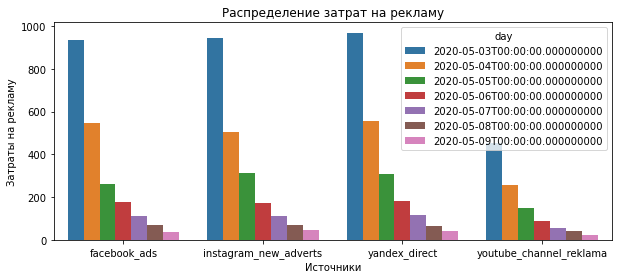

In [38]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x='source', y='cost', data=df_costs1, hue='day')
ax.set_xlabel('Источники')
ax.set_ylabel('Затраты на рекламу')
ax.set_title('Распределение затрат на рекламу')
plt.show()

Добавим к столбцу с датами 1 день, чтобы затраты и постройки были день в день.

In [39]:
df_costs2 = df_costs1.copy()
df_costs2['day'] = df_costs2['day'] + pd.Timedelta("1 day")
df_costs2.head(30)

,source,day,cost
0,facebook_ads,2020-05-04,935.9
1,facebook_ads,2020-05-05,548.4
2,facebook_ads,2020-05-06,260.2
3,facebook_ads,2020-05-07,178.0
4,facebook_ads,2020-05-08,111.8
5,facebook_ads,2020-05-09,68.0
6,facebook_ads,2020-05-10,38.7
7,instagram_new_adverts,2020-05-04,943.2
8,instagram_new_adverts,2020-05-05,502.9
9,instagram_new_adverts,2020-05-06,314.0


In [40]:
df_game.head(1)

,event_datetime,event,building_type,user_id,project_type,built,won,project,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama


Отберем данные, где были постройки

In [41]:
df_game.query('event == "building"').head()

,event_datetime,event,building_type,user_id,project_type,built,won,project,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,1,0,0,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,1,0,0,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,1,0,0,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,1,0,0,yandex_direct


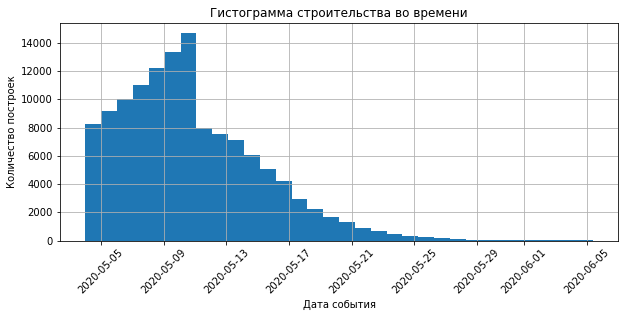

In [42]:
#Гистограмма построек по дате
plt.figure(figsize=(10,4))
df_game.query('event == "building"')['event_datetime'].hist(bins=32)
plt.ylabel('Количество построек')
plt.xlabel('Дата события')
plt.title('Гистограмма строительства во времени')
plt.xticks(rotation=45)
plt.show()

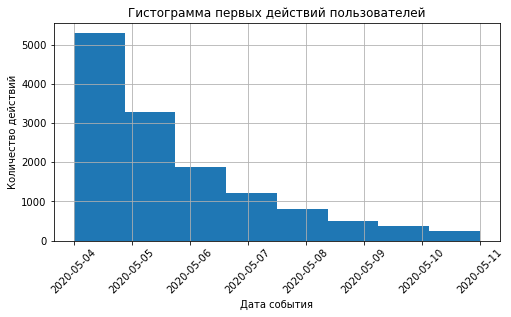

In [43]:
#Гистограмма по дате и времени
plt.figure(figsize=(8,4))
df_2['dt_min'].hist(bins=8)
plt.ylabel('Количество действий')
plt.xlabel('Дата события')
plt.title('Гистограмма первых действий пользователей')
plt.xticks(rotation=45)
plt.show()

Из последних трёх графиков видно, что количество первых действий совпадает по графику с затратами на рекламу по источникам.
При этом наибольшая активность в части стройки наблюдается на 10.05.2020 - последний день оплачиваемой рекламы.

In [44]:
df_costs1.groupby('source').agg({'cost':'sum'})

,cost
source,
facebook_ads,2141.0
instagram_new_adverts,2161.5
yandex_direct,2233.1
youtube_channel_reklama,1068.0


Всего потрачено на рекламу: 7603,6. График распределения затрат:

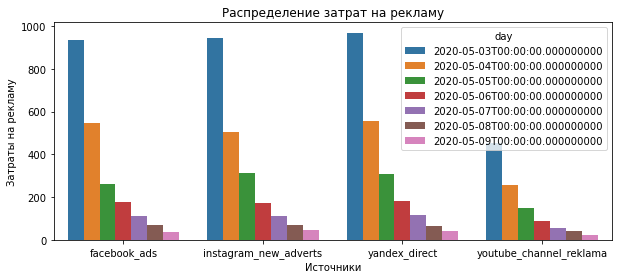

In [45]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x='source', y='cost', data=df_costs1, hue='day')
ax.set_xlabel('Источники')
ax.set_ylabel('Затраты на рекламу')
ax.set_title('Распределение затрат на рекламу')
plt.show()

Затраты с каждым последующим днем снижались по экспоненте с 03.05.2020 по 09.05.2020.

In [46]:
#приведем даты к единому формату, чтобы можжно было объединять данные
df_game['event_datetime'] = df_game['event_datetime'].dt.normalize()

In [47]:
df_game.head()

,event_datetime,event,building_type,user_id,project_type,built,won,project,source
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,1,0,0,facebook_ads
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,1,0,0,instagram_new_adverts
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,1,0,0,facebook_ads
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,1,0,0,yandex_direct


In [48]:
df_days=df_game.groupby(['event_datetime', 'source'], as_index=False).agg({'built':'sum', 'won':'sum', 'project':'sum'})
#df_days.columns = [tup[0] if tup[1] else tup[0] for tup in df_strategy.columns]
df_days.columns=['day', 'source', 'built', 'won', 'project']
df_days.head()

,day,source,built,won,project
0,2020-05-04,facebook_ads,1657,0,0
1,2020-05-04,instagram_new_adverts,2013,1,0
2,2020-05-04,yandex_direct,2888,0,0
3,2020-05-04,youtube_channel_reklama,1612,0,0
4,2020-05-05,facebook_ads,1864,1,0


In [49]:
#Получим объединенную таблицу построек с затратами.
df_days_costs = df_days.merge(
    df_costs2,
    how='left',
    left_on='day',
    right_on='day'
)
df_days_costs.head()

,day,source_x,built,won,project,source_y,cost
0,2020-05-04,facebook_ads,1657,0,0,facebook_ads,935.9
1,2020-05-04,facebook_ads,1657,0,0,instagram_new_adverts,943.2
2,2020-05-04,facebook_ads,1657,0,0,yandex_direct,969.1
3,2020-05-04,facebook_ads,1657,0,0,youtube_channel_reklama,454.2
4,2020-05-04,instagram_new_adverts,2013,1,0,facebook_ads,935.9


In [50]:
#pd.concat([df_days, df_costs2], verify_integrity=False, axis=1, join = 'inner')

In [51]:
df_costs3=df_costs2.sort_values(by=['day','source'])

In [52]:
df_days1=df_days.sort_values(by=['day','source'])

In [53]:
df_days_costs = df_days1.merge(
    df_costs3,
    how='left',
    on=['day', 'source']
)
df_days_costs.head()

,day,source,built,won,project,cost
0,2020-05-04,facebook_ads,1657,0,0,935.9
1,2020-05-04,instagram_new_adverts,2013,1,0,943.2
2,2020-05-04,yandex_direct,2888,0,0,969.1
3,2020-05-04,youtube_channel_reklama,1612,0,0,454.2
4,2020-05-05,facebook_ads,1864,1,0,548.4


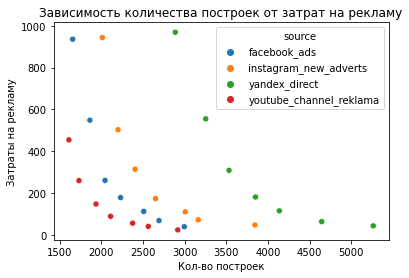

In [54]:
#Построим график зависимости построек от затрат
plt.figure(figsize=(6,4))
ax=sns.scatterplot(data=df_days_costs, 
                x='built', 
                y='cost', 
                hue='source'
               )
ax.set_xlabel('Кол-во построек')
ax.set_ylabel('Затраты на рекламу')
ax.set_title('Зависимость количества построек от затрат на рекламу')
plt.show()

In [55]:
#Определим даты первой постройки в отдельный датафрейм
df_game.head()

,event_datetime,event,building_type,user_id,project_type,built,won,project,source
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,1,0,0,facebook_ads
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,1,0,0,instagram_new_adverts
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,1,0,0,facebook_ads
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,1,0,0,yandex_direct


In [56]:
df_game_building=df_game.query('event =="building"')
df_game_building.head(1)

,event_datetime,event,building_type,user_id,project_type,built,won,project,source
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama


In [57]:
first_building = df_game_building.groupby('user_id').agg({'event_datetime': 'min'})
first_building.columns=['first_built']
first_building.head()

,first_built
user_id,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06
00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06
001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05
001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05
002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05


In [58]:
building = df_game_building.merge(first_building, how='inner', left_on='user_id', right_index=True)
building.head()

,event_datetime,event,building_type,user_id,project_type,built,won,project,source,first_built
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama,2020-05-04
10101,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama,2020-05-04
15489,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama,2020-05-04
16114,2020-05-05,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama,2020-05-04
17607,2020-05-06,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama,2020-05-04


In [59]:
one_day_filter = building['event_datetime'] - building['first_built'] < "1 day"

In [60]:
one_day_building = building[one_day_filter]

In [61]:
one_day_building.head()

,event_datetime,event,building_type,user_id,project_type,built,won,project,source,first_built
0,2020-05-04,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1,0,0,youtube_channel_reklama,2020-05-04
1,2020-05-04,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,1,0,0,facebook_ads,2020-05-04
2,2020-05-04,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,1,0,0,instagram_new_adverts,2020-05-04
3,2020-05-04,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,1,0,0,facebook_ads,2020-05-04
4,2020-05-04,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,1,0,0,yandex_direct,2020-05-04


In [62]:
df_one_day=one_day_building.groupby(['event_datetime', 'source'], as_index=False).agg({'built':'sum', 'won':'sum', 'project':'sum'})
#df_days.columns = [tup[0] if tup[1] else tup[0] for tup in df_strategy.columns]
df_one_day.columns=['day', 'source', 'built', 'won', 'project']
df_one_day.head()

,day,source,built,won,project
0,2020-05-04,facebook_ads,1657,0,0
1,2020-05-04,instagram_new_adverts,2013,0,0
2,2020-05-04,yandex_direct,2888,0,0
3,2020-05-04,youtube_channel_reklama,1612,0,0
4,2020-05-05,facebook_ads,991,0,0


In [63]:
df_days_costs_extra = df_one_day.merge(
    df_costs3,
    how='left',
    on=['day', 'source']
)
df_days_costs_extra.head()

,day,source,built,won,project,cost
0,2020-05-04,facebook_ads,1657,0,0,935.9
1,2020-05-04,instagram_new_adverts,2013,0,0,943.2
2,2020-05-04,yandex_direct,2888,0,0,969.1
3,2020-05-04,youtube_channel_reklama,1612,0,0,454.2
4,2020-05-05,facebook_ads,991,0,0,548.4


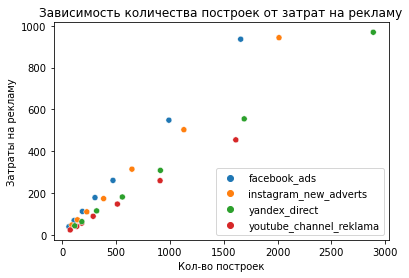

In [64]:
#Построим график зависимости построек от затрат
plt.figure(figsize=(6,4))
ax=sns.scatterplot(data=df_days_costs_extra, 
                x='built', 
                y='cost', 
                hue='source'
               )
ax.set_xlabel('Кол-во построек')
ax.set_ylabel('Затраты на рекламу')
ax.set_title('Зависимость количества построек от затрат на рекламу')
ax.legend(loc = 'lower right')
plt.show()

In [65]:
#Определим кол-во построек на 1 $
df_days_costs_extra['ratio']=df_days_costs_extra['built'] / df_days_costs_extra['cost']
df_days_costs_extra.head(5)

,day,source,built,won,project,cost,ratio
0,2020-05-04,facebook_ads,1657,0,0,935.9,1.770488
1,2020-05-04,instagram_new_adverts,2013,0,0,943.2,2.134224
2,2020-05-04,yandex_direct,2888,0,0,969.1,2.980085
3,2020-05-04,youtube_channel_reklama,1612,0,0,454.2,3.549097
4,2020-05-05,facebook_ads,991,0,0,548.4,1.807075


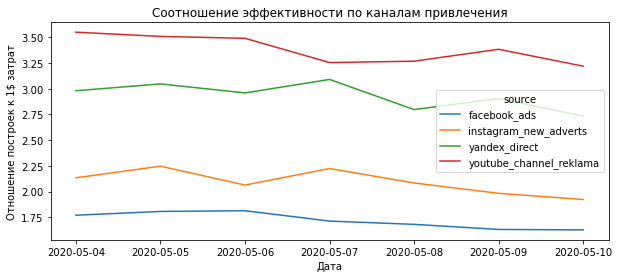

In [66]:
#Построим график соотношения построек к затратам
plt.figure(figsize=(10,4))
ax=sns.lineplot(data=df_days_costs_extra, y='ratio', x='day', hue='source')
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение построек к 1$ затрат')
ax.set_title('Соотношение эффективности по каналам привлечения')
plt.show()

In [67]:
#Определим кол-во построек на 1 $
df_days_costs['ratio']=df_days_costs['built'] / df_days_costs['cost']
df_days_costs.head(28)

,day,source,built,won,project,cost,ratio
0,2020-05-04,facebook_ads,1657,0,0,935.9,1.770488
1,2020-05-04,instagram_new_adverts,2013,1,0,943.2,2.134224
2,2020-05-04,yandex_direct,2888,0,0,969.1,2.980085
3,2020-05-04,youtube_channel_reklama,1612,0,0,454.2,3.549097
4,2020-05-05,facebook_ads,1864,1,0,548.4,3.398979
5,2020-05-05,instagram_new_adverts,2201,0,0,502.9,4.376616
6,2020-05-05,yandex_direct,3254,0,0,554.7,5.866234
7,2020-05-05,youtube_channel_reklama,1733,2,0,259.1,6.688537
8,2020-05-06,facebook_ads,2045,2,0,260.2,7.859339
9,2020-05-06,instagram_new_adverts,2406,1,0,314.0,7.662420


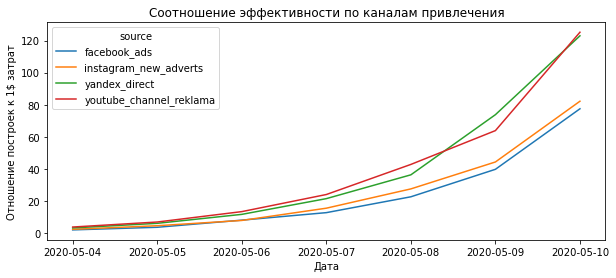

In [68]:
#Построим график соотношения построек к затратам
plt.figure(figsize=(10,4))
ax=sns.lineplot(data=df_days_costs, y='ratio', x='day', hue='source')
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение построек к 1$ затрат')
ax.set_title('Соотношение эффективности по каналам привлечения')
plt.show()

Из полученных графиков можно сделать следующие выводы:
1. Кол-во построек зависит от затрат  
2. При сопоставимых затратах на рекламу между ФБ, Инстаграммом и Яндексом эффективность, т.е. количество построек на единицу затрат почти в 2 раза выше у пользователей, пришедших с Яндекса и Ютуба.  
3. При пропорционально меньших затратах пользователи с Ютуба строили пропорционально меньше построек.  
4. Соотношение количества построек на 1ед. затрат у Яндекса - 2,9 и Ютуба - 3,4;  
у ФБ - 1,7 и Инстаграм - 2,1.

Резюме: при планировании затрат необходимо больше вкладывать в рекламу Яндекс и Ютуб.

6.Проверка гипотез

6.1. Гипотеза 1  
Нулевая гипотеза: Исследовательская стратегия занимает столько же времени на прохождение уровня, что и стратегия победителя.
Альтернативная гипотеза: Исследовательская стратегия занимает другое время на прохождение уровня, в сравнении со стратегией победителя.  
Подготовим датафреймы для работы.

In [69]:
df_stategy1=df_2.query('strategy == 1')
df_stategy1.head(1)

,user_id,built,won,project,dt_min,dt_max,dt_delta,strategy,source
3,001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,2020-05-05 21:02:05,2020-05-12 07:40:47,9278.7,1,instagram_new_adverts


In [70]:
df_stategy2=df_2.query('strategy == 2')
df_stategy2.head(1)

,user_id,built,won,project,dt_min,dt_max,dt_delta,strategy,source
13,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,11,1,1,2020-05-04 16:43:39,2020-05-16 11:22:33,16958.9,2,youtube_channel_reklama


In [71]:
alpha = 0.05

results = stats.ttest_ind(
    df_stategy2['dt_delta'],
    df_stategy1['dt_delta'],
    equal_var = True) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.256914637718452e-98
Отвергаем нулевую гипотезу


In [72]:
results

Ttest_indResult(statistic=21.4003747350921, pvalue=7.256914637718452e-98)

6.2. Гипотеза 2  
Нулевая гипотеза: Пользователи, привлеченные с яндекса, совершают больше построек, чем пользователи, привлеченные с фейсбук.
Альтернативная гипотеза: Пользователи, привлеченные с яндекса, совершают меньше построек, чем пользователи, привлеченные с фейсбук.

In [73]:
df_yandex=df_2.query('source == "yandex_direct"')
df_facebook=df_2.query('source == "facebook_ads"')

In [74]:
alpha = 0.01

results = stats.ttest_ind(
    df_yandex['built'],
    df_facebook['built'],
    equal_var = False) 
#учтем односторонность теста
print('p-значение:', results.pvalue /2 )

if (results.pvalue / 2 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(results)

p-значение: 0.00523409830927393
Отвергаем нулевую гипотезу
Ttest_indResult(statistic=-2.5608239550584244, pvalue=0.01046819661854786)


    Вывод:
1. Гипотеза о равенстве времени прохождения пользователями уровня по стратегиям 1 и 2 неверна.
2. Гипотеза, что пользователи, привлеченные с яндекса, строят больше, чем пользователи, привлеченные с фейсбук, неверна.


*Общие выводы*  
1. Всего 13576 пользователей.Из них:
по стратегии 1 - 3951  
по стратегии 2 - 1866  
по стратегии 3 - 7759  
2. Построено:
по стратегии 1 - 37185  
по стратегии 2 - 23601  
по стратегии 3 - 67170 
3. Минимальное количество построек для прохождения уровня по стратегии 1 - 2 здания, по стратегии 2 - 10 зданий. При этом каждый пользователь построил хотя бы 1 здание.
4. Медианное количество построек у пользователей по стратегии 2 - 12, по стратегии 1 - 10.
5. Всего потрачено на рекламу: 7603,6. Из них:
Фейсбук: 2141.0  
Инстаграм:	2161.5  
Яндекс:	2233.1  
Ютуб:	1068.0  
6. Затраты на рекламу снижались на источники с одинаковой отрицательной динамикой.
7. Количество построек на единицу затрат:  
Яндекса - 2,9  
Ютуба - 3,4  
ФБ - 1,7  
Инстаграм - 2,1  
8. Гипотеза о равенстве времени прохождения пользователями уровня по стратегиям 1 и 2 неверна. 
9. Гипотеза, что пользователи, привлеченные с яндекса, строят больше, чем пользователи, привлеченные с фейсбук, неверна.

Резюме.
1. При планировании затрат нужно больше закладывать на Яндекс и Ютуб.
2. При стратегии 1 количество построек в среднем меньше, чем при стратегии 2. Т.е. для компании выгоднее стратегия 2.
Поскольку время по стратегии 1 меньше, чем по стратегии 2, можно увеличить уровень "главного босса", чтобы мотивировать пользователей идти по стратегии 2 для прохождения уровня.

Яндекса - 2,9 и Ютуба - 3,4;
у ФБ - 1,7 и Инстаграм - 2,1

***Ссылка на презентацию:*** https://drive.google.com/file/d/14tgW__BrZD9aNa2Nfsm3btONqX5o71GC/view?usp=share_link

***Ссылка на дашборд:*** https://public.tableau.com/app/profile/alexander.chiz/viz/Final_project_16814956602690/Dashboard1?publish=yes